<a href="https://colab.research.google.com/github/ttjjdddduuqq/0913/blob/main/python20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [ ]:
import numpy as np                # numpy 패키지를  np 별칭으로 사용 (숫자들로 이루어진 배열)
import pandas as pd               # (테이블 형식의 DataFrame)
import matplotlib.pyplot as plt   # matplotlib 패키지의 pyplot 모듈을 plt 별칭으로 사용 (시각화)
import seaborn as sns             # (시각화)

# 데이터셋 준비

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

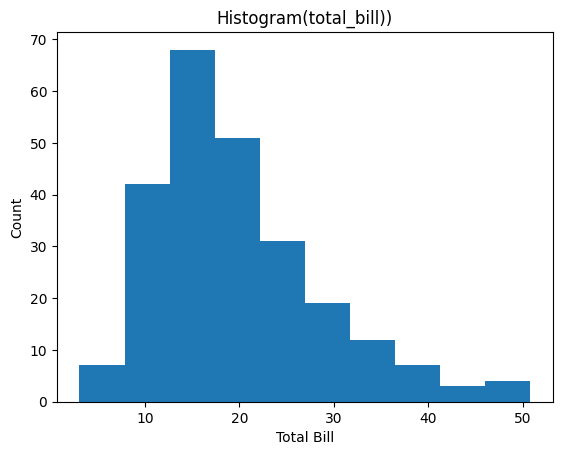

In [ ]:
# 1. figure 객체 생성
fig = plt.figure()

# 2. figure 객체에 Subplot(들)을 추가
#      figure.add_subplot(nrows, ncols, index)
#      - nrows: subplot의 행(row)의 개수
#      - ccols: subplot의 열(column)의 개수
#      - index: subplot의 위치(index)
#     axis = fig.add_subplot(1, 1, 1)
#     Figure.add_subplot(pos)
#     - pos: '행/열/인덱스' 순서로 만들어진 3자리 숫자
axis = fig.add_subplot(111)    # 백의 자리수= nrow / 십의 자리수= ncol / 일의 자리수= index


# 3. subplot에 그래프를 그림.
axis.hist(x=tips.total_bill)

# 4. 그래프의 옵션들을 설정
axis.set_title('Histogram(total_bill))')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기
plt.show()

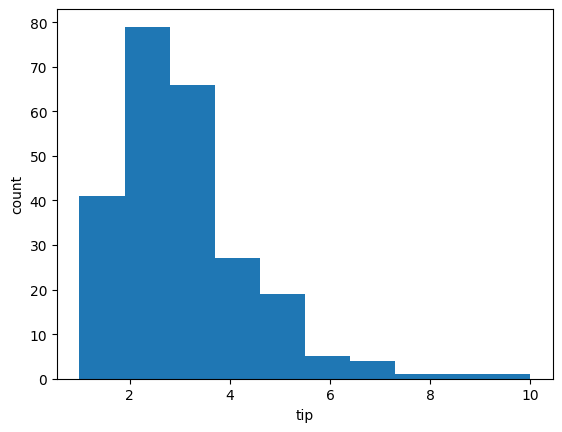

In [ ]:
# 1. Figure 객체 생성 + Subplot 추가
fig, axis = plt.subplots()  # subplots의 파라미터: nrows, ncols의 기본값 1


# 2.Subplot에 그래프 그림
axis.hist(x=tips.tip)

# 3. 그래프 옵션
axis.set_xlabel('tip')
axis.set_ylabel('count')

# 4. 그래프 보여주기
plt.show()

1개의 Figure에 1개의 Subplot만 있는 경우에는 pyplot 모듈의 top-level 그래프 함수를 직접 이용할 수도 있음.

top-level 그래프 함수를 사용하면 Figure 생성과  Subplot에 추가할 필요 없음

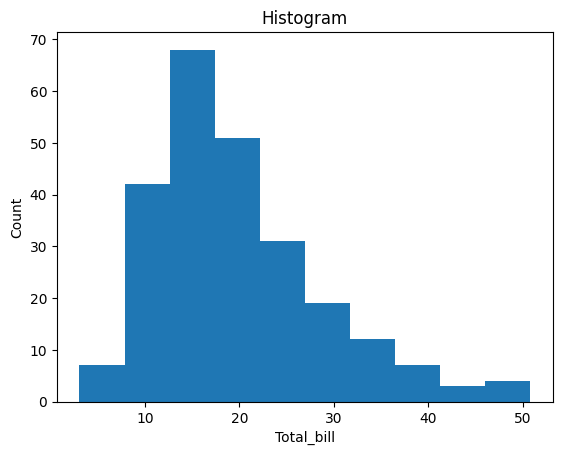

In [ ]:
# pyplot 함수 호출 -> Figure 객체 생성, Subplot(Axes)객체 생성, 그래프 생성
plt.hist(x=tips.total_bill)

# 옵션 성정 - pyplot 모듈의 함수 사용
plt.xlabel('Total_bill')
plt.ylabel('Count')
plt.title('Histogram')

plt.show()

*   1개의 figure 2개 Subplot을 위/아래로 배치(nrows 설정)
*   위쪽 Axes에는 total_bill 히스토그램을 작성.
*   아래쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

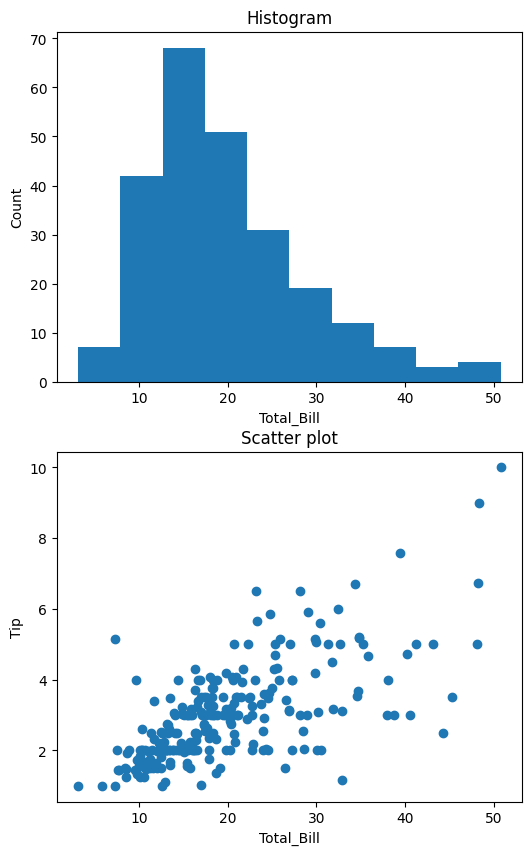

In [ ]:
# 1. Figure 객체 생성
fig = plt.figure(figsize=(6,10))

# 2. Figure 객체에  Subplot들을 추가
axis1 = fig.add_subplot(2, 1, 1)  # 위쪽 Axes
axis2 = fig.add_subplot(212)      # 아래쪽 Axes

# 3. 그래프 작성

axis1.hist(x=tips.total_bill)
axis2.scatter(x=tips.total_bill, y=tips.tip)

# 4. 옵션
axis1.set_title('Histogram')
axis1.set_xlabel('Total_Bill')
axis1.set_ylabel('Count')

axis2.set_title('Scatter plot')
axis2.set_xlabel('Total_Bill')
axis2.set_ylabel('Tip')

plt.show()

*   1개의 figure 2개 Subplot을 좌/우로 배치(ncols 설정)
*   왼쪽 Axes에는 total_bill 히스토그램을 작성.
*   오른쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

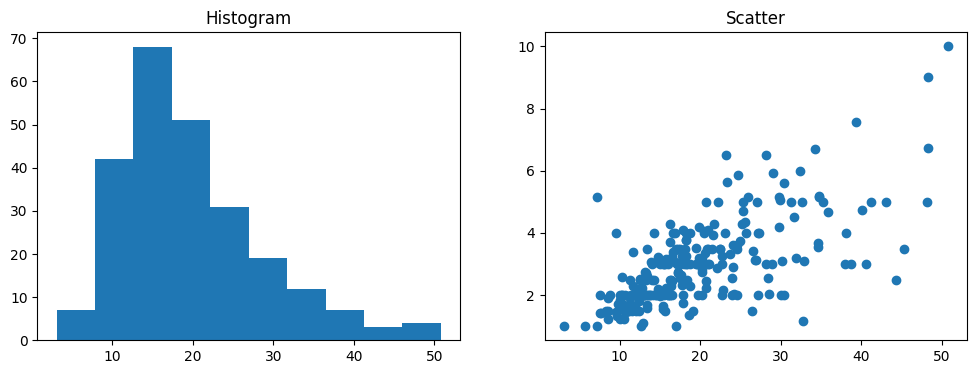

In [ ]:
# Figure 생성 + Subplot 추가
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
# fig.set_figwidth(12)

# 2. 왼쪽 축 (Axis)에 그래프 그리기 & 옵션
axes[0].hist(x=tips.total_bill)
axes[0].set_title('Histogram')

# 3. 오른쪽 축(Axis)에 그래프 그리기 & 옵션
axes[1].scatter(x=tips.total_bill, y=tips.tip)
axes[1].set_title('Scatter')

plt.show()

# Box Plot

숫자 타입(int, float) 변수의 기술 통계량(최솟값, 25%, 50%, 75% 최댓값)을 시각화

*   범주형 데이터 ( 카테고리, 문자열 )에서는 사용 못함
*   숫자열 데이터만 가능, 데이터의 평균값은 모름



In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


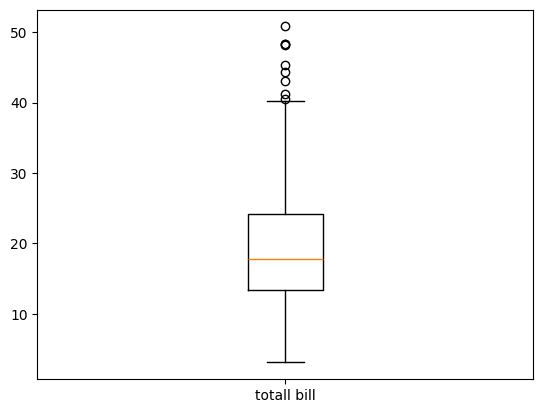

In [ ]:
plt.boxplot(x=tips.total_bill,tick_labels=['totall bill'])
plt.show()

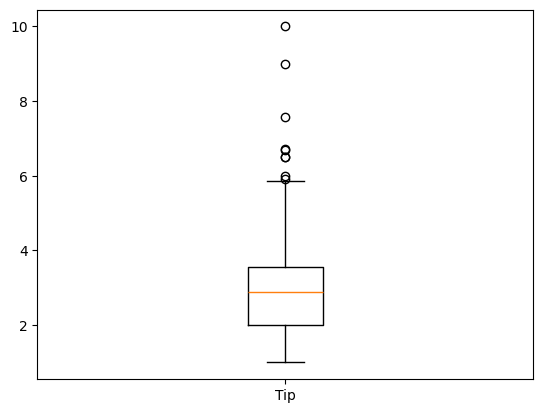

In [ ]:
plt.boxplot(x=tips.tip, tick_labels= ['Tip'])
plt.show()

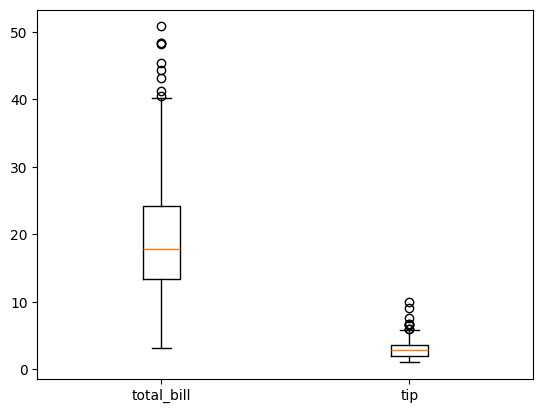

In [ ]:
# total_bill 과 tip의 boxplot을 함께 사용
plt.boxplot(x=[tips.total_bill, tips.tip], tick_labels=['total_bill' , 'tip'])
plt.show()

1개의 figure를 2개 subplot으로 나누고(좌/우방향), 각각의 subplot에 total_bill, tip의  boxplot을 그리시오

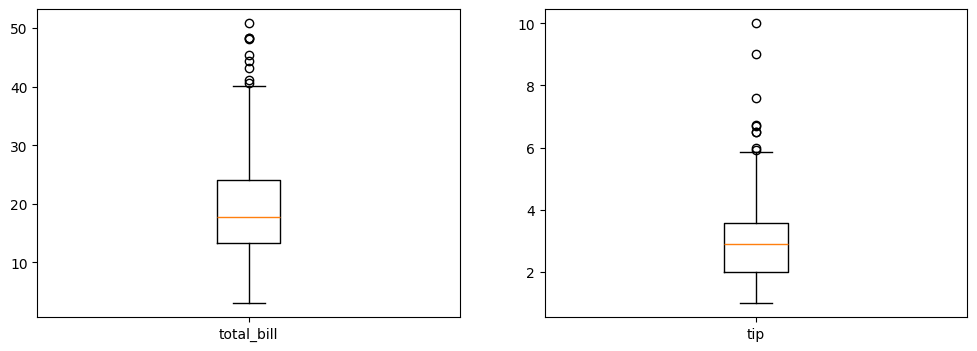

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axes[0].boxplot(x=tips.total_bill, tick_labels=['total_bill'])

axes[1].boxplot(x= tips.tip, tick_labels=['tip'])

plt.show()

## 성별 팁의 boxplot

*   남성 tip의 기술 통계량
*   여성 tip의 기술 통계량
*   성별 tip의 boxplot

In [ ]:
male_tip = tips[tips.sex == 'Male'].tip
male_tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [ ]:
female_tip = tips[tips.sex == 'Female'].tip
female_tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


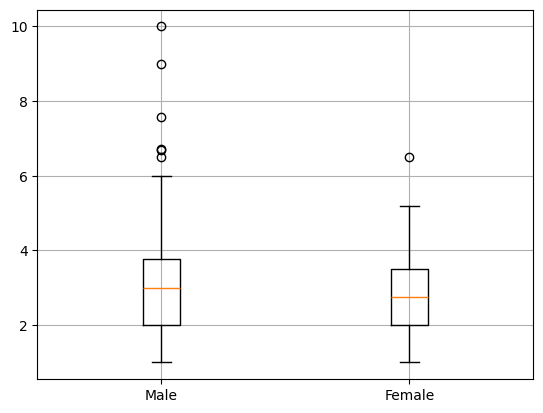

In [ ]:
plt.boxplot(x =[male_tip, female_tip], tick_labels= ['Male', 'Female'])
plt.grid()
plt.show()

## 시간 별(Lunch, Dinner)팁의 boxplot

In [ ]:
l_tip = tips[tips.time == 'Lunch'].tip
l_tip.describe()

,tip
count,68.000000
mean,2.728088
std,1.205345
min,1.250000
25%,2.000000
50%,2.250000
75%,3.287500
max,6.700000


In [ ]:
d_tip = tips[tips.time == 'Dinner'].tip
d_tip.describe()

,tip
count,176.000000
mean,3.102670
std,1.436243
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,10.000000


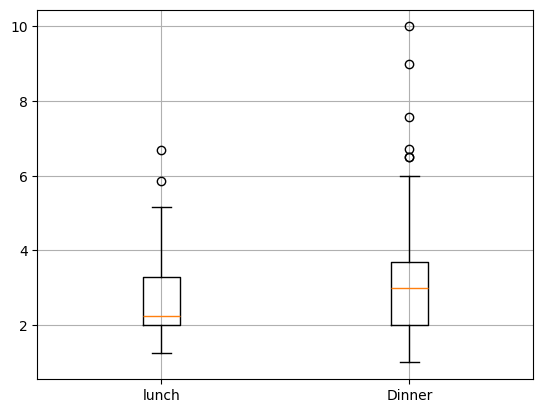

In [ ]:
plt.boxplot(x=[l_tip , d_tip], tick_labels=['lunch','Dinner'])
plt.grid()
plt.show()

## 요일별(Thir,Fri,Sat,Sun)팁의 boxplot


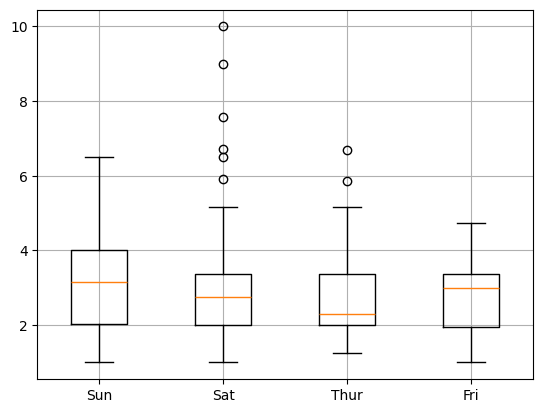

In [ ]:
data = []  # box plot을 그리기 위한 데이터. boxplot 함수의 x 파라미터에 전달할 아규먼트
days= tips.day.unique()
for d in days:
    day_tip = tips[tips.day == d].tip
    data.append(day_tip)

plt.boxplot(x=data, tick_labels = days)
plt.grid()
plt.show()

In [ ]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# Histogram(히스토그램)

연속형 자료(숫자 타입 자료)를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프

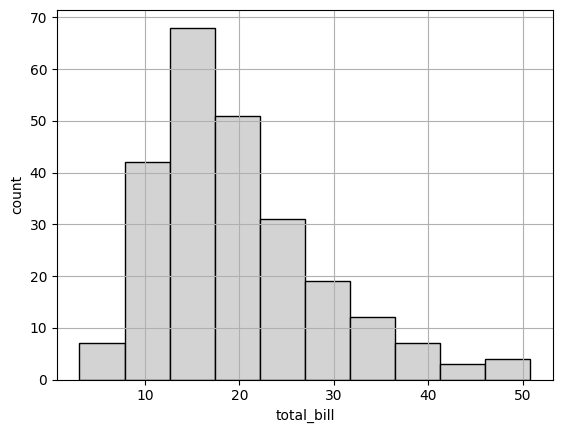

In [ ]:
plt.hist(x=tips.total_bill,     # 히스토그램을 그리기 위한 연속형 자료
         bins=10,               # bins=  -> 막대 개수. 또는 나누는 구간.
         edgecolor='black',     # edgecolor=  -> 막대의 테두리 색깔
         color='Lightgray')     # color=   -> 막대 내부를 채우는 색깔
plt.xlabel('total_bill')
plt.ylabel('count')
plt.grid()                    # grid()  -> 가로, 새로 선을 나타냄
plt.show()

# bins= np.arange(0, 70, 10)  -> 0 부터 70까지 10씩 증가
# bins= (0,10, 20, 40, 60)  -> 막대 크기도 나눌 수 있음

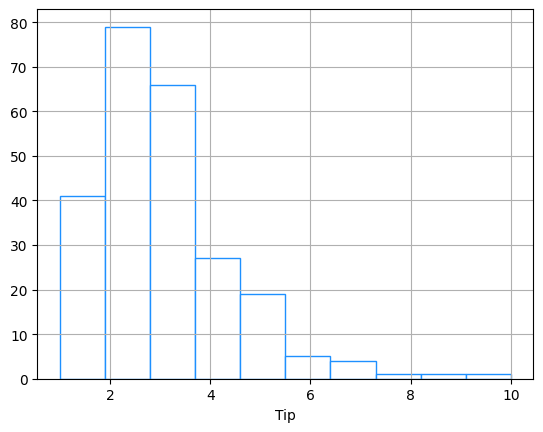

In [ ]:
plt.hist(x=tips.tip, edgecolor= 'dodgerblue', color= 'white')
plt.grid()
plt.xlabel('Tip')
plt.show()

*   boxplot , histogram = 숫자형 타입 (연속형 자료)에서 사용하는 그래프

# Bar Plot(막대 그래프)

카테고리(범주) 타입 변수의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(verical bar plot)

In [ ]:
# 성별 빈도수(frequency)
gender_counts = tips.sex.value_counts()
gender_counts

,count
sex,
Male,157
Female,87


In [ ]:
gender_counts.index  # Series.index 속성

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [ ]:
gender_counts.values # Series.value 속성

array([157,  87])

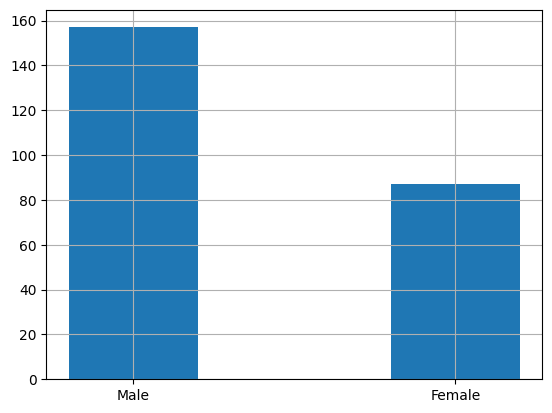

In [ ]:
plt.bar(x=gender_counts.index,             # x= 카테고리 타입
        height=gender_counts.values,       # height= 막대 세로 길이. 빈도수.
        width=0.4)
plt.grid()                         # width= 막대 가로 길이. 기본값은 0.8
plt.show()

## 가로 막대 그래프(horizontal bar plot)

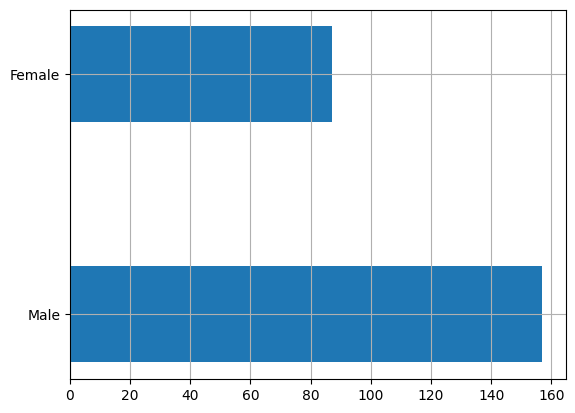

In [ ]:
plt.barh(y=gender_counts.index,          # y= 카테고리(범주)
         width= gender_counts.values,    # width= 막대 가로 길이. 빈도수
         height=(0.4))                   # height= 막대 세로 길이. 기본값은 0.8
plt.grid()
plt.show()

size( 한 테이블의 손님수)  빈도수와 (가로/세로)막대 그래프

In [ ]:
size_counts = tips['size'].value_counts()
size_counts

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


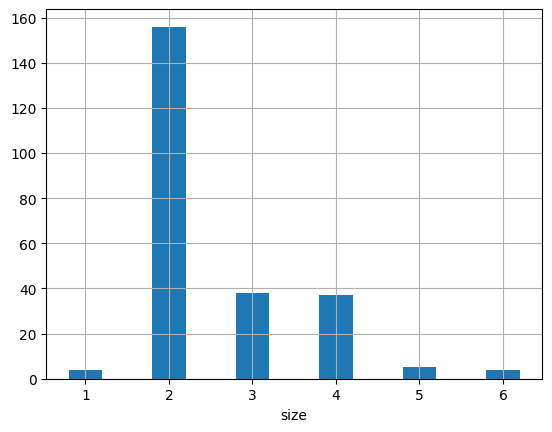

In [ ]:
plt.bar(x=size_counts.index,
        height= size_counts,
        width= 0.4)
plt.xlabel('size')
plt.grid()
plt.show()

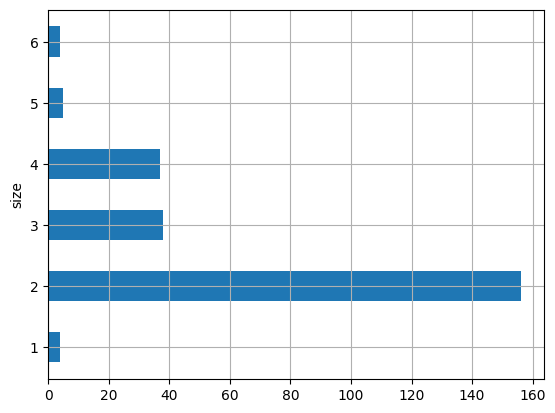

In [ ]:
plt.barh(y= size_counts.index,
         width= size_counts,
         height= 0.5)
plt.ylabel('size')
plt.grid()
plt.show()

*   4개의 subplt을 2개 행과 2개 열로 추가.
*   성별, 흡연여부, 요일, 시간 빈도수 막대 그래프 작성

In [ ]:
plt.bar

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

In [ ]:
gender_counts = tips.sex.value_counts()
gender_counts

,count
sex,
Male,157
Female,87


In [ ]:
smoker_counts = tips.smoker.value_counts()
smoker_counts

,count
smoker,
No,151
Yes,93


In [ ]:
day_counts = tips.day.value_counts()
day_counts

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
time_counts = tips.time.value_counts()
time_counts

,count
time,
Dinner,176
Lunch,68


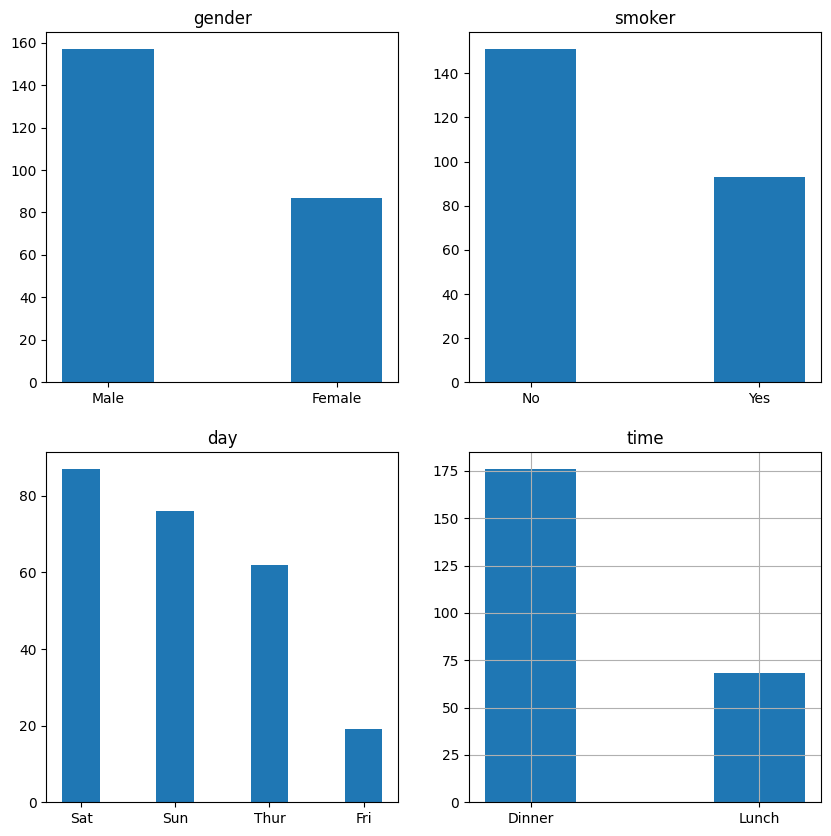

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

axes[0,0].bar(x=gender_counts.index, height= gender_counts, width= 0.4)
axes[0,0].set_title('gender')
axes[0,1].bar(x=smoker_counts.index, height= smoker_counts, width= 0.4)
axes[0,1].set_title('smoker')
axes[1,0].bar(x=day_counts.index, height= day_counts, width= 0.4)
axes[1,0].set_title('day')
axes[1,1].bar(x=time_counts.index, height= time_counts, width= 0.4)
axes[1,1].set_title('time')

plt.grid()
plt.show()

## numpy.ndarray 클래스 타입 vs Python list 클래스 타입

In [ ]:
number_list1 = [1, 2, 3, -1, -2, -3]
print(type(number_list1))
print(number_list1)    # - > list는 아이템과 아이템을 comma(,)로 구분해서 출력

<class 'list'>
[1, 2, 3, -1, -2, -3]


In [ ]:
number_array1 = np.array([1, 2, 3, -1, -2, -3])
print(type(number_array1))
print(number_array1)   # -> ndarray는 아이템과 아이템을 공백으로 구분해서 출력


<class 'numpy.ndarray'>
[ 1  2  3 -1 -2 -3]


list는 `list + list` 연산과 `list + int ` 연산만 제공

In [ ]:
number_list2 =[10, 20, 30]
print(number_list1 + number_list2)
print(number_list2 * 3)

[1, 2, 3, -1, -2, -3, 10, 20, 30]
[10, 20, 30, 10, 20, 30, 10, 20, 30]


numpy.ndarray는 모든 산술 연산이 가능. 같은 위치(인덱스)의 원소들끼리(element-wise) 산술 연산을 수행.

In [ ]:
number_array2 = np.ones(shape=(6), dtype=np.int64)  # np.array([1,1,1,1,1,1])
print(number_array2)
print(number_array1 + number_array2)

[1 1 1 1 1 1]
[ 2  3  4  0 -1 -2]


In [ ]:
print(number_array1 * 3)

[ 3  6  9 -3 -6 -9]


2차원 list vs 2차원 배열 인덱스 사용 방법

In [ ]:
# 파이썬의 list 객체
list_2d =[
    [1,2,3],
    [4,5,6]
]
print(list_2d)
print(list_2d[0])
print(list_2d[0][0])  # 2차원 list ; list[i][j]


[[1, 2, 3], [4, 5, 6]]
[1, 2, 3]
1


In [ ]:
# numpy.ndarray 객체
array_2d = np.array(list_2d)
print(array_2d)
print(array_2d[0])
print(array_2d[0][0])    # 2차원 배열(ndarray) ; array[i][j]
print(array_2d[0,0])   # array[i,j]

[[1 2 3]
 [4 5 6]]
[1 2 3]
1
1


## 반복문을 사용한 subplot

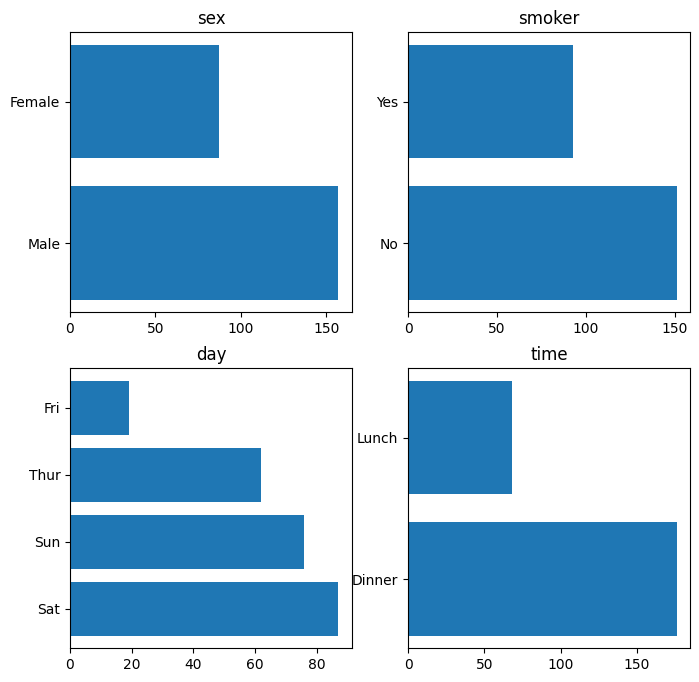

In [ ]:
# 모르면 넘어가
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
# print(axes)

titles = np.array([['sex','smoker'] , ['day','time']])
# print(titles)
for i, row in enumerate(titles):
    for j, x in enumerate(row):
        frequency = tips[x].value_counts()
        axes[i,j].barh(y=frequency.index, width= frequency)
        axes[i,j].set_title(x)

plt.show()

In [ ]:
titles = np.array([['sex', 'smoker'], ['day', 'time']])
# print(titles)
for row in titles:
    for x in row:
        frequency = tips(x).value_counts()
print(frequency)

TypeError: 'DataFrame' object is not callable

# Scatter Plot(산점도)

*   두 변수(컬럼) 간의 상관 관계를 알고 싶을 때 사용.
*   `y ~ x`(y와x간의 관계)  관계 시각화.
    *   y : 관심 변수, 종속 변수.
    *   x : 독립 변수.

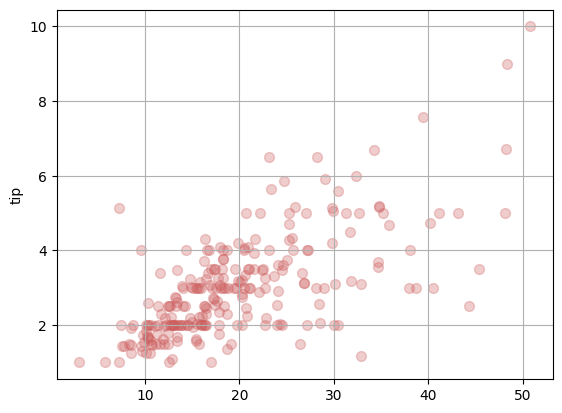

In [ ]:
# tip ~ total_bill 관계

plt.scatter(x=tips.total_bill, y=tips.tip,  # x축, y축에 사용할 변수(컬럼)
            alpha=0.3,                      # alpha= -> 투명도(0:투명 ~ 1:불투명)
            s=50,                           # s: size 마커의 크기.
            c='indianred',                  # c: size 마커의 색깔.
            marker= 'o')                    # marker: coloe  마커의 모양(o,s,v,^,*,+, ...)
plt.ylabel('tip')

plt.grid()
plt.show()

*   tip ~ total_bill 상관 관계
*   마커 색깔을 남성-dodgerblue , 여성-indianred

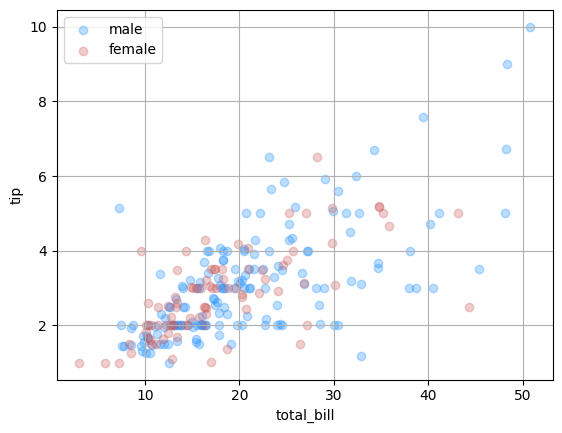

In [ ]:
male_df = tips[tips.sex == 'Male']
female_df = tips[tips.sex == 'Female']
plt.scatter(x=male_df.total_bill, y= male_df.tip, c='dodgerblue', alpha=0.3, label='male')
plt.scatter(x=female_df.total_bill, y= female_df.tip, c = 'indianred', alpha=0.3, label='female')

plt.legend()   # legend(): scatter 함수의 label 파라미터 값을 범례로 표시
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.grid()

plt.show()

# Line Plot( 선 그래프 )

주로 시계열 데이터(주식, 환율, 미세먼지 농도, ...)를 시각화

In [ ]:
# 선 그래프를 그리기 위한 가상 데이터
np.random.seed(1)  # 실행할 때마다 항상 같은 난수들이 만들어지도록 하기 위해서.
df = pd.DataFrame(data={
    'day': np.arange(1,11),     # np.arange(start, stop, step) [start, stop)범위의 step만큼씩 변하는 정수들의 배열(ndarray)
    'price': np.random.rand(10) # np.random.rand(d): [0, 1) 범위의 실수 난수 d개를 갖는 배열(ndarray)
})
df

,day,price
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


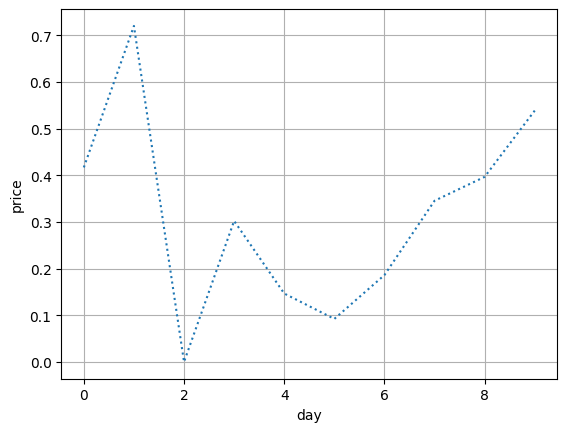

In [ ]:
 # x축의 day, y축에 price로 하는 선 그래프
plt.plot(df.price,':')  # plt.plot(x, y, fmt)
# plot의 세번째 아규먼트 fmt(format):
# - color(색깔), maker(마커 모양), linestyle(선 스타일) 정보를 문자열로 작성 순서 지켜야 함!!
# - color: b(blue), r(red), g(green), k(black), ...
# - marker: 0, s, ^, v, * ...
# - lineStyle: -(직선), --(DASHED LINE), :(dotted line), ...

plt.grid()
plt.xlabel('day')
plt.ylabel('price')
plt.show()

# Ex 1.
tips 데이터셋에서 tip ~ total_bill의 산점도를 그리세요.
*   성별(Male/Female)에 따라서 마커의 색깔을 다르게 표현 m s/m ns f s/ f ns
*   흡연 여부에 따라서 마커의 모양을 다르게 표현
*   범례를 표시

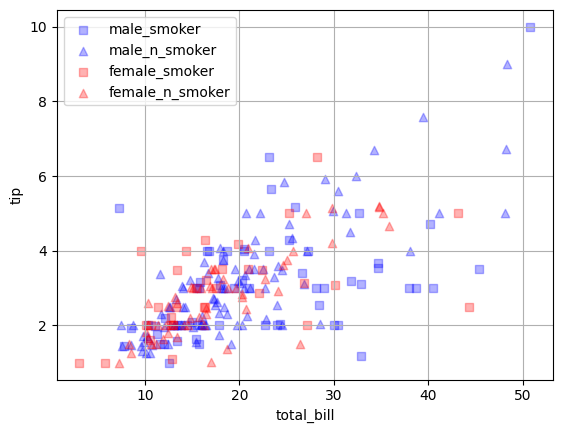

In [ ]:
male_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]
male_n_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]
female_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]
female_n_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]

plt.scatter(x=male_smoker.total_bill, y= male_smoker.tip, c='blue', marker='s',
            alpha=0.3, label='male_smoker')
plt.scatter(x=male_n_smoker.total_bill, y= male_n_smoker.tip, c = 'blue', marker='^',
            alpha=0.3, label='male_n_smoker')
plt.scatter(x=female_smoker.total_bill, y= female_smoker.tip, c='red', marker='s',
            alpha=0.3, label='female_smoker')
plt.scatter(x=female_n_smoker.total_bill, y= female_n_smoker.tip, c='red', marker='^',
            alpha=0.3, label='female_n_smoker')

plt.legend()   # legend(): scatter 함수의 label 파라미터 값을 범례로 표시
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.grid()

plt.show()

In [ ]:
gender = tips.sex.unique()
smoker = tips.smokers.unique()
colors = ['dodgerblue', 'indianred']
markers = ['s', '^']

for g , c in zip(gender, colors):
    for s, m in (smokers, markers):
        df = tips[(tip.sex == g) & (tip.sex == s)]
        plt.scatter(x=df.total_bill, y=df.tip,c='red', marker='^', alpha=0.3, label=f'{g} smoker-{}')

SyntaxError: f-string: empty expression not allowed (<ipython-input-68-e31f112103eb>, line 9)

## Ex 2.
아래의 데이터 프레임에서 apple, samsung, hynix 데이터를 선 그래프로 그리세요.
*   선 그래프 3개가 함께 표현
*   각각의 데이터는 다른 색깔, 마커, 선 스타일로 표현
*   범례 표시

In [ ]:
np.random.seed(1)
df = pd.DataFrame({'apple': np.random.rand(10),
                   'samsung': np.random.rand(10),
                   'hynix': np.random.rand(10)})
df

,apple,samsung,hynix
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


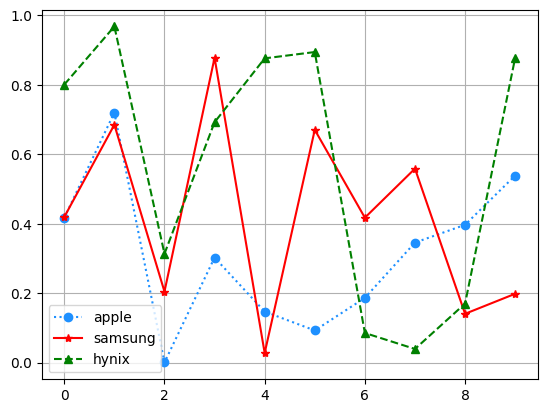

In [ ]:
plt.plot(df.apple, c='dodgerblue', marker= 'o', linestyle=':', label='apple')
plt.plot(df.samsung, c='red', marker= '*', linestyle='-', label='samsung')
plt.plot(df.hynix, c='green', marker= '^',linestyle='--', label='hynix')

plt.grid()
plt.legend()
plt.show()

## Ex 3.
iris 데이터셋 시각화.
*   seaborn 패키지의 iris 예제 데이터셋 로드
*   DataFrame 확인(`info`, `describe`, `value_counts` 등)
*   petal_width ~ petal_length 산점도
    *   species 별로 마커의 색깔을 다르게 표현

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

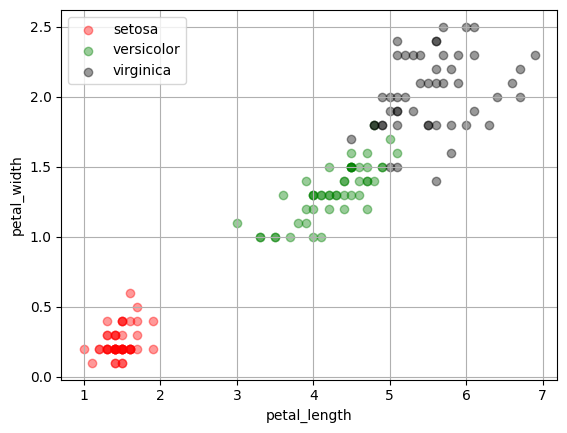

In [ ]:
# petal_width ~ petal_length 산점도
# plt.scatter(x=male_smoker.total_bill, y= male_smoker.tip, c='dodgerblue', alpha=0.3, label='male_smoker')

species_setosa = iris[iris.species == 'setosa']
species_versicolor = iris[iris.species == 'versicolor']
species_virginica = iris[iris.species == 'virginica']

plt.scatter(x=species_setosa.petal_length, y=species_setosa.petal_width, c='red', alpha=0.4, label='setosa' )
plt.scatter(x=species_versicolor.petal_length, y=species_versicolor.petal_width, c='green', alpha=0.4, label='versicolor' )
plt.scatter(x=species_virginica.petal_length, y=species_virginica.petal_width, c='black', alpha=0.4, label='virginica' )

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.grid()
plt.show()

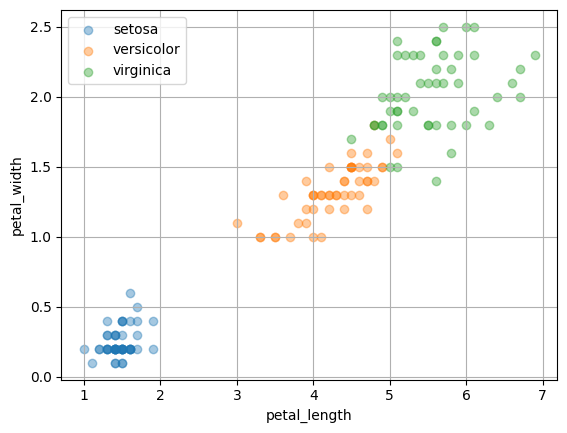

In [ ]:
species = iris.species.unique()
for s in species:
    df = iris[iris.species == s]
    plt.scatter(x = df.petal_length, y=df.petal_width, alpha=0.4, label=s)

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.grid()

plt.show()